In [129]:
from docplex.mp.model import Model
import numpy as np
import time
import sys
import random
import csv

from numpy import *
import math
import matplotlib.pyplot as plt

#import plotly.plotly as py
#import plotly.figure_factory as ff
#py.plotly.tools.set_credentials_file(username='Aelixs', api_key='DWfemarhjVa8nDeZyXcN')

In [155]:
class ReadingError(Exception):
    pass

def build_summaries(csvfile):
    output = []
    summary = {}
    with open(csvfile, newline='') as csvfile:
            reader = csv.reader(csvfile, delimiter=',', quotechar='', quoting=csv.QUOTE_NONE)
            matrix = []
            debut = False
            fin = False
            res = None
            i=0
            for row in reader:
                i=i+1
                if len(row) == 0 : 
                    summary['matrix'] = matrix
                    output.append(summary)
                    summary = {}
                    matrix = []
                    res = None 
                    debut = False
                    fin = False 
                elif not debut and not fin and len(row) == 3 and row[0] != "---" :
                    summary['num_matrix'] = int(row[0])
                    summary['nb_task'] = int(row[2])
                    summary['nb_machine'] = int(row[1])
                elif not debut and not fin and len(row) == 1 and row[0] == "---": 
                    debut = True
                elif debut:
                    if row[0] == "---":
                        fin = True
                    elif len(row) == 4:
                        matrix.append(row)
                    elif fin:
                        if len(row) == 2:
                            summary['execution_time'] = row[0]
                            summary['score'] = row[1]
                        else :
                            raise ReadingError("Erreur à la lecture du temps d'exécution et du résultat du solveur, ligne : ", row)
                    else:
                        raise ReadingError("Le fichier est mal formé, ligne : ", row)
                else : 
                    raise ReadingError("Le fichier est très mal formé, ligne : ", row, i)
    return output 

In [163]:
def plot_resultat(resultat): 
    for s in resultat:
        M = s['nb_machine']
        J = s['nb_task']

        # Plot the jobs
        for r in s['matrix']:     
            m = int(r[0])
            j = int(r[1])
            start = int(r[2])
            finish = int(r[3])
            x = [start, finish]
            y = [m+1, m+1]
            plt.plot(x, y, linewidth=3.0)
            plt.text(mean(x), m+1+0.2, "%d" % j)

        plt.xlabel('Time')
        plt.ylabel('Machine')
        plt.ylim([0,M+1])
        plt.yticks(np.arange(0, M+1, 1.0))
        plt.show()

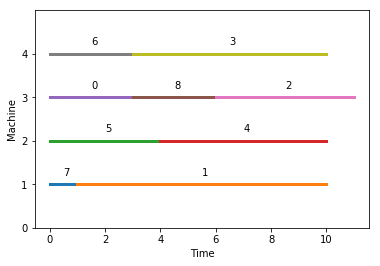

In [164]:
out = build_summaries("output.txt")
plot_resultat(out)